<a href="https://colab.research.google.com/github/ddonggsa/project/blob/master/%E1%84%87%E1%85%AE%E1%84%89%E1%85%B3%E1%84%90%E1%85%B3%E1%84%8F%E1%85%A9%E1%84%89%E1%85%B3_1_4_%E1%84%80%E1%85%A5%E1%86%AB%E1%84%80%E1%85%A1%E1%86%BC%E1%84%80%E1%85%A5%E1%86%B7%E1%84%8C%E1%85%B5%E1%86%AB_%E1%84%80%E1%85%AA%E1%84%8C%E1%85%A6_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* 미션 수행을 위해 아래 셀을 실행해 주세요!
* 한글폰트 설정 :  https://github.com/ychoi-kr/koreanize-matplotlib

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
# 한글폰트 사용을 위해 설치
# 아래 모듈을 설치하고 불러오면 별도의 한글폰트 설정이 필요 없습니다.
# colab 에서도 아래 설치 문구의 주석을 제거하고 설치하고 import 해주기만 하면 한글폰트가 잘 나옵니다.
!pip install koreanize-matplotlib

import koreanize_matplotlib

Traceback (most recent call last):
  File "<frozen importlib._bootstrap>", line 671, in _load_unlocked
  File "<frozen importlib._bootstrap_external>", line 848, in exec_module
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "/usr/local/lib/python3.8/dist-packages/pip/_internal/cli/cmdoptions.py", line 23, in <module>
    from pip._internal.cli.parser import ConfigOptionParser
  File "/usr/local/lib/python3.8/dist-packages/pip/_internal/cli/parser.py", line 12, in <module>
    from pip._internal.configuration import Configuration, ConfigurationError
  File "/usr/local/lib/python3.8/dist-packages/pip/_internal/configuration.py", line 26, in <module>
    from pip._internal.utils.logging import getLogger
  File "/usr/local/lib/python3.8/dist-packages/pip/_internal/utils/logging.py", line 27, in <module>
    from pip._internal.utils.misc import ensure_dir
  File "/usr/local/lib/python3.8/dist-packages/pip/_internal/utils/misc.py", line 35, in <module>


In [ ]:
# df = pd.read_csv("boostcourse-ds-510/data/NHIS_OPEN_GJ_2017.CSV.zip", encoding="cp949")
df = pd.read_csv("https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/NHIS_OPEN_GJ_2017.CSV.zip",
                 encoding="cp949")
df.shape

(1000000, 34)

In [ ]:
df.columns

Index(['기준년도', '가입자일련번호', '성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)',
       '체중(5Kg 단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부', '구강검진 수검여부', '치아우식증유무', '결손치유무', '치아마모증유무', '제3대구치(사랑니)이상',
       '치석', '데이터공개일자'],
      dtype='object')

In [ ]:
df.head(10)

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
0,2017,1,1,13,46,170.0,65.0,91.0,1.0,1.2,...,25.0,3.0,0.0,1,NaN,NaN,NaN,NaN,1.0,20181126
1,2017,2,2,8,41,150.0,45.0,73.4,1.2,1.0,...,10.0,1.0,0.0,1,NaN,NaN,NaN,NaN,1.0,20181126
2,2017,3,1,8,45,175.0,75.0,94.0,1.0,0.8,...,136.0,1.0,0.0,1,NaN,NaN,NaN,NaN,0.0,20181126
3,2017,4,2,12,11,155.0,55.0,67.5,0.9,1.0,...,30.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN,20181126
4,2017,5,1,8,41,175.0,75.0,93.0,1.5,1.5,...,68.0,3.0,0.0,0,NaN,NaN,NaN,NaN,NaN,20181126
5,2017,6,1,8,11,170.0,70.0,84.8,1.2,1.0,...,33.0,2.0,1.0,1,NaN,NaN,NaN,NaN,1.0,20181126
6,2017,7,1,8,48,175.0,110.0,111.5,1.0,1.0,...,45.0,3.0,1.0,0,NaN,NaN,NaN,NaN,NaN,20181126
7,2017,8,2,6,26,170.0,70.0,78.0,0.8,0.7,...,13.0,1.0,0.0,0,NaN,NaN,NaN,NaN,NaN,20181126
8,2017,9,1,8,41,170.0,80.0,93.0,0.7,0.9,...,51.0,2.0,0.0,1,NaN,NaN,NaN,NaN,1.0,20181126
9,2017,10,1,8,11,170.0,70.0,86.0,1.0,1.0,...,88.0,1.0,1.0,1,NaN,NaN,NaN,NaN,0.0,20181126


## TODO 1 연령대별 허리둘레에 대한 기술통계를 구한 결과입니다. 다음 제공되는 딕셔너리를 통해 연령대코드(5세단위)를 "연령대"로 만들고 아래와 같은 기술통계값을 구해주세요!

```
age_code = {1: '0~4세',
 2: '5~9세',
 3: '10~14세',
 4: '15~19세',
 5: '20~24세',
 6: '25~29세',
 7: '30~34세',
 8: '35~39세',
 9: '40~44세',
 10: '45~49세',
 11: '50~54세',
 12: '55~59세',
 13: '60~64세',
 14: '65~69세',
 15: '70~74세',
 16: '75~79세',
 17: '80~84세',
 18: '85세+'}
```


* 다음의 결과가 나오며, 소숫점 표현 방식이 다르더라도 출력값이 같으면 상관 없습니다. 예를 들어 예시결과는 32인데 직접 구한 값이 32.0 로 보이더라도 상관이 없습니다.


| 연령대   |   count |    mean |      std |   min |   25% |   50% |   75% |   max |
|:---------|--------:|--------:|---------:|------:|------:|------:|------:|------:|
| 20~24세  |   23244 | 75.1522 | 12.2518  |  47.5 |  67.5 |  73.4 |  81   | 999   |
| 25~29세  |   64898 | 77.7048 | 16.7357  |  48   |  69   |  76.5 |  84.2 | 999   |
| 30~34세  |   77517 | 81.0893 | 22.9881  |  49   |  72   |  80.1 |  88   | 999   |
| 35~39세  |   84621 | 82.094  | 14.5221  |   9.2 |  75   |  82   |  89   | 999   |
| 40~44세  |  130912 | 80.4883 | 10.8031  |  42.1 |  73   |  80   |  87   | 999   |
| 45~49세  |  118357 | 80.8224 |  9.52162 |  40   |  74   |  81   |  87   | 137   |
| 50~54세  |  129833 | 81.0628 |  9.09544 |   6.5 |  75   |  81   |  87   | 142   |
| 55~59세  |  112175 | 81.7999 |  8.7304  |  32   |  76   |  82   |  87.5 | 139   |
| 60~64세  |  106491 | 82.7228 |  8.59618 |   0   |  77   |  83   |  88   | 137   |
| 65~69세  |   53624 | 83.5885 |  8.44354 |  50   |  78   |  83.5 |  89   | 129   |
| 70~74세  |   51586 | 84.0634 |  8.53964 |  51   |  78   |  84   |  90   | 129.8 |
| 75~79세  |   25972 | 84.2001 |  8.77231 |  50   |  78   |  84   |  90   | 122   |
| 80~84세  |   16205 | 83.7514 |  9.04109 |  38   |  78   |  84   |  90   | 120   |
| 85세+    |    4125 | 81.7367 | 17.326   |  34   |  75   |  81.5 |  88   | 999   |


In [ ]:
age_code = {1: '0~4세',
 2: '5~9세',
 3: '10~14세',
 4: '15~19세',
 5: '20~24세',
 6: '25~29세',
 7: '30~34세',
 8: '35~39세',
 9: '40~44세',
 10: '45~49세',
 11: '50~54세',
 12: '55~59세',
 13: '60~64세',
 14: '65~69세',
 15: '70~74세',
 16: '75~79세',
 17: '80~84세',
 18: '85세+'}
df_replace = df.replace({"연령대코드(5세단위)" : age_code})
df_replace.rename(columns = {"연령대코드(5세단위)":"연령대"},inplace = True)
#pivot_table로 나타내기
df_replace.pivot_table(index="연령대", values="허리둘레", aggfunc="describe")
#groupby로 나타내기
df_replace.groupby(["연령대"])["허리둘레"].describe()


,count,mean,std,min,25%,50%,75%,max
연령대,,,,,,,,
20~24세,23244.0,75.152220,12.251781,47.5,67.5,73.4,81.0,999.0
25~29세,64898.0,77.704783,16.735734,48.0,69.0,76.5,84.2,999.0
30~34세,77517.0,81.089268,22.988111,49.0,72.0,80.1,88.0,999.0
35~39세,84621.0,82.094012,14.522095,9.2,75.0,82.0,89.0,999.0
40~44세,130912.0,80.488308,10.803098,42.1,73.0,80.0,87.0,999.0
45~49세,118357.0,80.822449,9.521622,40.0,74.0,81.0,87.0,137.0
50~54세,129833.0,81.062754,9.095438,6.5,75.0,81.0,87.0,142.0
55~59세,112175.0,81.799905,8.730398,32.0,76.0,82.0,87.5,139.0
60~64세,106491.0,82.722769,8.596176,0.0,77.0,83.0,88.0,137.0


## TODO 2 "음주여부", "흡연상태", "연령대코드(5세단위)", "성별코드"에 대한 상관계수를 구하고 시각화 해주세요.

* 다음의 결과가 나오도록 합니다. 이 때 그래프의 색상, 스타일 표현방식에 차이가 있더라도 상관계수값이 차이가 없다면 문제 없습니다.

<img src="https://i.imgur.com/WRc7SWw.png" width="500">

<ipython-input-47-3a9e589a57f6>:9: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df_corr, dtype=np.bool))


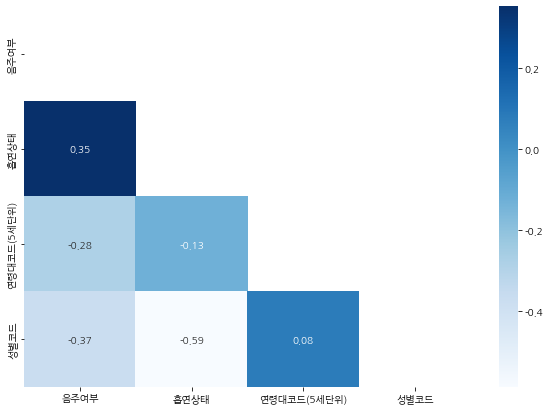

In [ ]:
import matplotlib.pyplot as plt

#상관계수에 사용할 칼럼들을 담가
columns = ["음주여부","흡연상태","연령대코드(5세단위)","성별코드"]
df_small = df[columns]
df_corr = df_small.corr()
df_corr

mask = np.triu(np.ones_like(df_corr, dtype=np.bool))
plt.figure(figsize=(10, 7))
sns.heatmap(df_corr, annot=True, fmt=".2f", cmap="Blues", mask=mask)

## TODO 3 흡연하는 사람과 음주하는 사람들의 수는 얼마나 차이가 있을까요? 

* 건강보험에서 제공하고 있는 데이터는 용량을 줄이기 위해 대부분의 데이터를 숫자 형태로 제공하고 있습니다. replace 기능을 사용하면 딕셔너리의 값을 의미하는 문자 형태로 변경해 볼 수 있습니다. 다음 제공되는 딕셔너리 값을 사용하여 숫자가 의미하는 문자 형태로 변경한 뒤 전체 데이터에서 음주와 흡연에 대한 교차 테이블을 구해 각 해당 빈도수를 구하고 시각화 해주세요!

```python
# 흡연 1(피우지 않는다), 2(이전에 피웠으나 끊었다), 3(현재도 피우고 있다)
# 음주 0(마시지 않은다), 1(마신다)
smoke = {1 : "흡연안함", 2: "끊음", 3: "흡연중"}
drink = {0: "안마심", 1: "마심"}
```

* groupby, pivot_table로 구할 수도 있지만, 수업에서는 다루지 않았던 pandas의 crosstab 기능을 사용해서도 비교적 쉽게 구할 수 있습니다.
* crosstab 을 사용할 때는 다음의 문서를 참고하여 구해보세요. [pandas.crosstab — pandas documentation](https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html)
* 그리고 막대그래프를 통해 결과를 시각화해주세요! 시각화를 할 때 그래프의 스타일이나 막대의 색상 등이 달라도 상관 없으니 사용하고 싶은 스타일을 적용해서 시각화해도 좋습니다.

`결과 예시`

| 음주   |   끊음 |   흡연안함 |   흡연중 |
|:-------|-------:|-----------:|---------:|
| 마심   | 120779 |     213743 |   162166 |
| 안마심 |  55334 |     394503 |    52845 |


<img src="https://i.imgur.com/ieW7ocg.png" width=500>

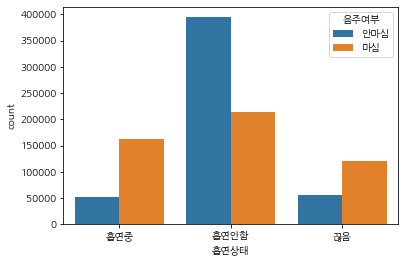

In [ ]:
import seaborn as sns
# 흡연 1(피우지 않는다), 2(이전에 피웠으나 끊었다), 3(현재도 피우고 있다)
# 음주 0(마시지 않은다), 1(마신다)
smoke = {1 : "흡연안함", 2: "끊음", 3: "흡연중"}
drink = {0: "안마심", 1: "마심"}
# df["흡연"]
# df["음주"]
df_replace_2 = df.replace({"흡연상태" : smoke})
df_replace_3 = df_replace_2.replace({"음주여부" : drink})
df_replace_3.groupby(["음주여부","흡연상태"])["가입자일련번호"].count()

pd.pivot_table(df_replace_3, index=["음주여부", "흡연상태"], values="가입자일련번호", aggfunc="count")
pd.crosstab(df_replace_3["음주여부"],df_replace_3["흡연상태"],colnames = ["흡연"],rownames = ["음주"],values = "가입자일련번호",aggfunc="count")

sns.countplot(data=df_replace_3, x="흡연상태", hue="음주여부")

## TODO 3-4 체중이 120Kg 이상인 데이터를 찾아 "총콜레스테롤", "감마지티피" 값을 음주여부에 따라 산점도로 시각화해주세요!
* 체중이 120Kg 이 넘는다면 비만으로 건강관리가 필요합니다. 120Kg 이상인 데이터를 찾아 "총콜레스테롤", "감마지티피" 값을 음주여부에 따라 산점도로 시각화해주세요! (이때 120Kg 도 포함되게 구합니다.) 그래프의 설정과 seaborn 버전에 따라 여백이나 회귀선의 시작과 끝점에 차이가 있을 수 있습니다. 

<img src="https://i.imgur.com/0gMa9g4.png">

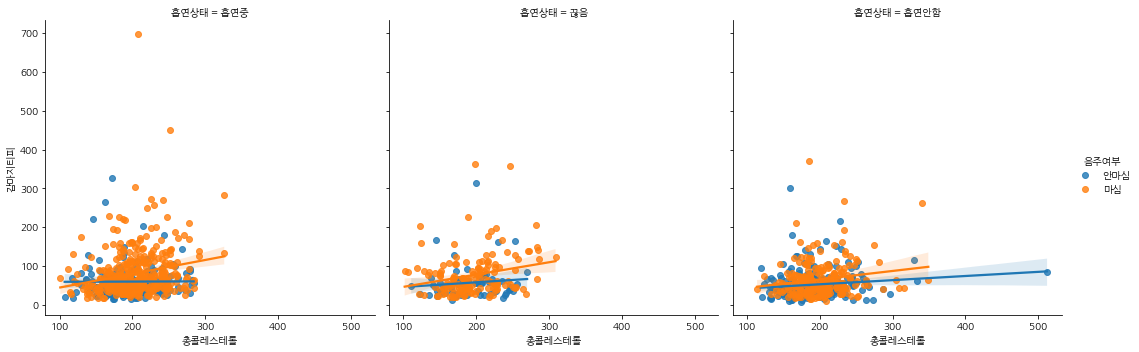

In [ ]:
df_ASLT = df_replace_3[(df_replace_3["체중(5Kg 단위)"] > 120) | (df_replace_3["체중(5Kg 단위)"] == 120)]

sns.lmplot(data=df_ASLT, x="총콜레스테롤", y="감마지티피", hue="음주여부", col = "흡연상태")

## TODO 5 연령대별로 시력은 얼마나 차이가 날까요? 연령대, 성별 좌우 평균 시력을 시각화 해주세요!

* 시력은 0.1~2.5 사이의 값으로 표기하며 0.1 이하의 시력은 0.1, 실명은 9.9로 표기합니다.
* 실명인 데이터를 평균에 포함하게 되면 시력에 대한 평균을 제대로 구하기 어렵습니다. 실명 데이터를 제외하고 연령대, 성별에 따른 평균 좌우 시력을 구해주세요!

* 서브플롯으로 시각화하려 표현해 주고 matplotlib 에 대한 사용법은 다음의 영상도 함께 참고해 주세요! 
* 시각화 예시는 참고사항으로 스타일이나 폰트 구성이 달라도 연령대, 성별 좌우평균시력을 시각화 하면 됩니다.
* https://www.youtube.com/watch?v=ZTRKojTLE8M


<img src="https://i.imgur.com/wA6GEEb.png">

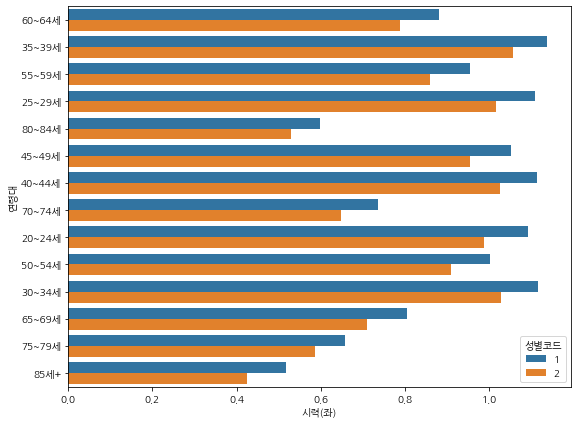

In [68]:
drop_row = df_replace[(df_replace["시력(좌)"] == 9.9) | (df_replace["시력(우)"] == 9.9)].index
drop_row = drop_row.tolist()
drop_row
df_replace = df_replace.drop(drop_row, axis=0)
plt.figure(figsize = (9,7))
sns.barplot(data = df_replace, x = "시력(좌)", y = "연령대", hue = "성별코드",ci = None)


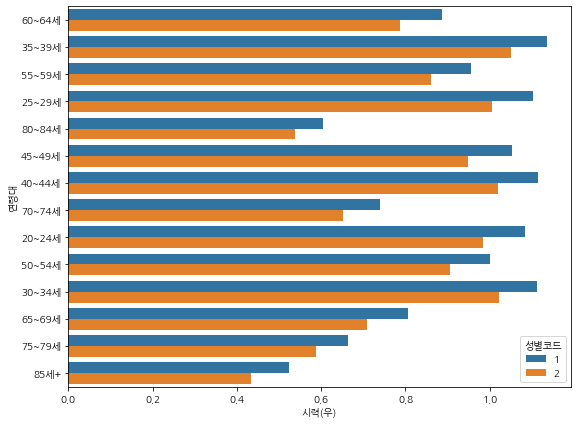

In [ ]:
plt.figure(figsize = (9,7))
sns.barplot(data = df_replace, x = "시력(우)", y = "연령대", hue = "성별코드",ci = None)